In [2]:
# STEP 1: IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler



In [3]:
# STEP 2: MOUNT DRIVE
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [4]:
# STEP 3: LOAD DATA SET
df = pd.read_csv("/content/drive/MyDrive/DATA SET FOR TASK/1) iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# STEP 4: UNDERSTAND THE DATA SET
# ✅ Explanation

# 1. df.info() Shows: Column names, Data types If there are missing values

# 2. df.describe() Shows: Mean, Min, Max, Standard deviation, Useful for numerical columns

# 3. df.isnull().sum() Counts missing values in each column.
# If it shows 0 → No missing data
# If it shows numbers → We must fix them

# 4.  df.isnull() Returns a DataFrame of the same shape, Shows True where a value is missing (NaN),Shows False where a value is present

# 5. df.isnull().sum(): This is used to check how many missing values are in each column of your dataset.





In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [9]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [10]:
# STEP 5: HANDLING MISSING DATA: If there are missing values, we fix them.

# 🔹 For Numerical Columns (Fill with Mean)
for col in df.select_dtypes(include=np.number).columns:
    df[col] = df[col].fillna(df[col].mean())


In [11]:
# Explanation

# select_dtypes(include=np.number) → Selects only numeric columns

# fillna() → Replaces missing values

# mean() → Replaces missing value with average of that column

# Reason:Because it keeps the data balanced.

In [12]:
# 🔹 For Categorical Columns (Fill with Mode)
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])


In [13]:
# STEP 6: REMOVE OUTLIER USING IQR
# Outliers = extreme values that are too high or too low.
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]



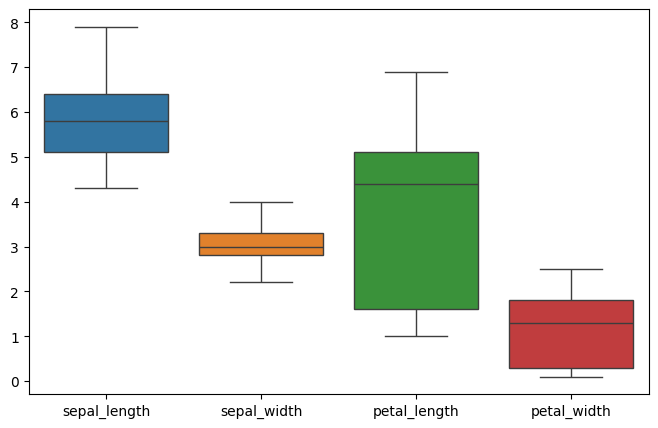

In [14]:
# VISUAL CHECK
plt.figure(figsize=(8,5))
sns.boxplot(data=df[numerical_cols])
plt.show()


In [15]:
# CONVERT CATIGORICAL TO NUMERICAL
# In Iris dataset, the categorical column is usually: species

# Use Label Encoding
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])


In [16]:
# STEP 8: SCALE NUMERICAL DATA ( STANDARDIZATION)
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [18]:
# STEP 9: SAVED CLEANED DATASET
df.to_csv("cleaned_iris.csv", index=False)

In [19]:
# STEP 10 DOWNLOAD CLEAN DATASET
from google.colab import files
files.download("cleaned_iris.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>